<a id='top'></a>

# Webscraping of TransferMarkt Data
##### Notebook to scrape raw data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 13/09/2020

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [github/eddwebster](https://github.com/eddwebster/), and 
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [2]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# APIs
from tyrone_mings import * 

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [4]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [5]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_21st_club = os.path.join(base_dir, 'data', '21st_club')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to scrape football data from [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using Tableau, PowerBI, Microsoft Excel.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
[TransferMarkt](https://www.transfermarkt.co.uk/) is a German-based website owned by [Axel Springer](https://www.axelspringer.com/en/) and is the leading website for the football transfer market. The website posts football related data, including: scores and results, football news, transfer rumours, and most usefully for us - calculated estimates ofthe market values for teams and individual players.

To read more about how these estimations are made, [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann does an excellent job of explaining how the estimations are made and their level of accuracy.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

### <a id='#section3.3'>3.3. Creating the DataFrame - scraping the data</a>
Before scraping data from [TransferMarkt](https://www.transfermarkt.co.uk/), we need to look at the leagues in England that we wish to scrape.

The [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS) for [TransferMarkt](https://www.transfermarkt.co.uk/) is made up of two parts:
1.    In the first part, the scraper takes the webpages for each of the individual leagues  e.g. the Championship, and extract the hyperlinks to the pages of all the individual teams in the league table.
2.    In the second part the script, the webscraper uses the list of invidual teams hyperlinks collected in part 1 to then collect the hyperlinks for each of the players for those teams. From this, the scraper can then extract the information we need for each of these players. This information is downloaded in two parts - bio and status. This is then joined together using the player_id.

This information collected for all the players is converted to a [pandas](http://pandas.pydata.org/) DataFrame from which we can view and manipulate the data.

An example webpage for a football league is the following: https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/GB2/plus/?saison_id=2020. As we can see, between the subdirectory path of `'/wettbewerb/'` and the `'/plus/'`, there is a 3 or 4 digit code. For the Championship, the code is GB2. 

In order to scrape the webpages from [TransferMarkt](https://www.transfermarkt.co.uk/), the codes the three EFL leagues in questions - Championship, League One, and League Two need to be recorded from [TransferMarkt](https://www.transfermarkt.co.uk/), which are the following:

| League Name on FIFA    | Country    | Corresponding [TransferMarkt](https://www.transfermarkt.co.uk/) League Code    |
|------|-----|-----|
| EFL Championship   | England    | GB2    |
| EFL League One   | England    | GB3    |
| EFL League Two   | England    | GB4    |

#### <a id='#section3.3.1.'>3.3.1. 2018/19 Season</a>

In [5]:
## Define season
season = '2018'

## List of players
player_urls_championship_1819 = get_player_urls_from_league_page(f'https://www.transfermarkt.co.uk/championship/startseite/wettbewerb/GB2/plus/?saison_id={season}', verbose=True)
player_urls_league_one_1819 = get_player_urls_from_league_page(f'https://www.transfermarkt.co.uk/championship/startseite/wettbewerb/GB3/plus/?saison_id={season}', verbose=True)
player_urls_league_two_1819 = get_player_urls_from_league_page(f'https://www.transfermarkt.co.uk/championship/startseite/wettbewerb/GB4/plus/?saison_id={season}', verbose=True)

## Join three leagues to create one, unified EFL list
player_urls_efl_1819 = player_urls_championship_1819 + player_urls_league_one_1819 + player_urls_league_two_1819

birmingham city players added
fc millwall players added
ipswich town players added
swansea city players added
bolton wanderers players added
norwich city players added
west bromwich albion players added
hull city players added
queens park rangers players added
aston villa players added
rotherham united players added
derby county players added
bristol city players added
fc brentford players added
sheffield united players added
wigan athletic players added
leeds united players added
stoke city players added
sheffield wednesday players added
blackburn rovers players added
fc reading players added
nottingham forest players added
preston north end players added
fc middlesbrough players added
fc portsmouth players added
fleetwood town players added
bristol rovers players added
southend united players added
wycombe wanderers players added
coventry city players added
fc blackpool players added
scunthorpe united players added
luton town players added
fc barnsley players added
bradford city play

In [6]:
# List length i.e. total players
len(player_urls_efl_1819)

2846

In [11]:
player_urls_efl_1819

['https://www.transfermarkt.com/steve-seddon/profil/spieler/564049',
 'https://www.transfermarkt.com/josh-cogley/profil/spieler/452683',
 'https://www.transfermarkt.com/david-stockdale/profil/spieler/67339',
 'https://www.transfermarkt.com/lee-camp/profil/spieler/13443',
 'https://www.transfermarkt.com/tomasz-kuszczak/profil/spieler/1320',
 'https://www.transfermarkt.com/viv-solomon-otabor/profil/spieler/391127',
 'https://www.transfermarkt.com/craig-gardner/profil/spieler/37171',
 'https://www.transfermarkt.com/jonathan-grounds/profil/spieler/57490',
 'https://www.transfermarkt.com/michael-morrison/profil/spieler/66497',
 'https://www.transfermarkt.com/maxime-colin/profil/spieler/156618',
 'https://www.transfermarkt.com/greg-stewart/profil/spieler/156775',
 'https://www.transfermarkt.com/connal-trueman/profil/spieler/344586',
 'https://www.transfermarkt.com/kerim-mrabti/profil/spieler/225569',
 'https://www.transfermarkt.com/jacques-maghoma/profil/spieler/45522',
 'https://www.transfe

##### Bio Information

In [42]:
# Run this script to scrape latest version of this data from TransferMarkt

## Start timer
tic = datetime.datetime.now()

## Create empty list
lst_df = []

## Scrape information for each player
for player_page in player_urls_efl_1819:
    try:
        output_dict = tm_pull(player_page, player_bio=True, output='pandas')
        df = output_dict['player_bio']
        lst_df.append(df)
    except:
        pass

## Concatenate DataFrames
df_efl_bio_1819 = pd.concat(lst_df)

## End timer
toc = datetime.datetime.now()

## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape the bio data of all the players for the EFL 2018/19 season is: {total_time/60:0.2f} minutes.')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [44]:
## Create attribute for the season    
df_efl_bio_1819['season'] = '2018-2019'

In [45]:
# Datetime
import datetime
from datetime import date
import time

In [46]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [48]:
# Export scraped DataFrame as a CSV
df_efl_bio_1819.to_csv(data_dir_tm + '/raw/1819/bio/' + f'tm_player_efl_bio_all_1819_last_updated_{today}.csv', index=None, header=True)

In [49]:
# Display DataFrame
df_efl_bio_1819

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,foot,second_citizenship,season
0,129604,ezgjan alioski,12,2,1992,Prilep,Macedonia,1992-02-12,None,171,left,Switzerland,2018-2019
0,410708,pascal struijk,11,8,1999,Deurne,Belgium,1999-08-11,None,190,left,Belgium,2018-2019
0,198728,hadi sacko,24,3,1994,Corbeil-Essonnes,France,1994-03-24,None,183,left,France,2018-2019
0,530384,tom pearce,12,4,1998,Ormskirk,England,1998-04-12,None,185,left,None,2018-2019
0,110668,laurens de bock,7,11,1992,Dendermonde,Belgium,1992-11-07,None,179,left,None,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,300498,jack bridge,21,9,1995,Southend-on-Sea,England,1995-09-21,None,178,None,None,2018-2019
0,467551,joe iaciofano,9,9,1998,Northampton,England,1998-09-09,None,178,right,None,2018-2019
0,646899,jack newell,22,1,2001,London,England,2001-01-22,None,186,None,None,2018-2019
0,320854,timi max elsnik,29,4,1998,Zlatoličje,Slovenia,1998-04-29,None,182,left,None,2018-2019


##### Status Information

In [12]:
# Run this script to scrape latest version of this data from TransferMarkt

## Start timer
tic = datetime.datetime.now()

## Create empty list
lst_df = []

## Scrape information for each player
for player_page in player_urls_efl_1819:  
    try:
        output_dict = tm_pull(player_page, player_status=True, output='pandas')
        df = output_dict['player_status']
        lst_df.append(df)
    except:
        pass

## Concatenate DataFrames
df_efl_status_1819 = pd.concat(lst_df)

## End timer
toc = datetime.datetime.now()

## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape the status data of all the players for the EFL 2018/19 season is: {total_time/60:0.2f} minutes.')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Time taken to scrape the status data of all the players for the EFL 2018/19 season is: 57.41 minutes.


In [13]:
## Create attribute for the season    
df_efl_status_1819['season'] = '2018-2019'

In [14]:
# Datetime
import datetime
from datetime import date
import time

In [15]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [16]:
# Export scraped DataFrame as a CSV
df_efl_status_1819.to_csv(data_dir_tm + '/raw/1819/status/' + f'tm_player_efl_status_all_1819_last_updated_{today}.csv', index=None, header=True)

In [17]:
# Display DataFrame
df_efl_status_1819

,player_id,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season
0,564049,birmingham city,england,150000,2019-07-01,2021-06-30,Option for a further year,None,None,None,KIN,2018-2019
0,452683,birmingham city,england,100000,2016-07-01,2021-06-30,None,None,None,None,Crown Football Ltd,2018-2019
0,67339,wycombe wanderers,england,400000,2020-09-09,2021-06-30,None,None,None,None,YMU Group,2018-2019
0,13443,without club,NA,300000,2020-08-01,None,None,None,None,None,None,2018-2019
0,1320,retired,NA,0,2019-07-01,None,None,None,None,None,None,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
0,425764,scunthorpe united,england,0,2020-08-03,2021-06-30,None,None,None,None,None,2018-2019
0,91289,cheltenham town,england,150000,2018-08-27,2021-06-30,None,None,None,None,None,2018-2019
0,471910,cheltenham town,england,0,2018-07-01,2021-06-30,None,None,None,None,None,2018-2019
0,638697,cirencester town fc,england,0,2020-08-09,2021-06-30,None,None,None,None,None,2018-2019


In [23]:
df_efl_status_1819.dtypes

player_id               object
current_club            object
current_club_country    object
market_value            object
joined                  object
contract_expires        object
contract_option         object
on_loan_from            object
on_loan_from_country    object
loan_contract_expiry    object
player_agent            object
season                  object
dtype: object

##### Bio and Status Joined

In [78]:
# Join the Bio and Status DataFrames to form one, unified DataFrame
df_efl_1819 = pd.merge(df_efl_bio_1819, df_efl_status_1819, left_on='player_id', right_on='player_id', how='left')

In [79]:
# Export the scraped DataFrame as a CSV
df_efl_1819.to_csv(data_dir_tm + '/raw/1819/combined/' + f'tm_player_efl_joined_all_1819_last_updated_{today}.csv', index=None, header=True)

In [80]:
# Display DataFrame
df_efl_1819

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,173900,hélder costa,12,1,1994,Luanda,Angola,1994-01-12,None,179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392763,ian poveda,9,2,2000,London,England,2000-02-09,None,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,332337,will huffer,30,10,1998,London,England,1998-10-30,None,184,...,NA,100000,2020-07-01,None,None,None,None,None,Stellar Football Ltd,2018-2019
3,335721,ben white,8,10,1997,Poole,England,1997-10-08,None,185,...,england,5500000,2018-07-01,2024-06-30,None,None,None,None,None,2018-2019
4,596446,leif davis,12,1,2000,Newcastle,England,2000-01-12,None,177,...,england,100000,2018-07-04,2023-06-30,None,None,None,None,None,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,131980,conor thomas,29,10,1993,Coventry,England,1993-10-29,None,185,...,england,150000,2018-07-01,2021-06-30,None,None,None,None,TRP Sports,2018-2019
3030,91289,chris clements,6,2,1990,Birmingham,England,1990-02-06,None,175,...,england,150000,2018-08-27,2021-06-30,None,None,None,None,None,2018-2019
3031,471910,alex addai,20,12,1993,London,England,1993-12-20,None,178,...,england,0,2018-07-01,2021-06-30,None,None,None,None,None,2018-2019
3032,698011,tom chamberlain,1,6,2002,Cheltenham,England,2002-06-01,None,187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <a id='#section3.3.2.'>3.3.2. 2019/20 Season</a>

In [30]:
# Create list of links for players to scrape

## Define season
season = '2019'

## List of players
player_urls_championship_1920 = get_player_urls_from_league_page(f'https://www.transfermarkt.co.uk/championship/startseite/wettbewerb/GB2/plus/?saison_id={season}', verbose=True)
player_urls_league_one_1920 = get_player_urls_from_league_page(f'https://www.transfermarkt.co.uk/championship/startseite/wettbewerb/GB3/plus/?saison_id={season}', verbose=True)
player_urls_league_two_1920 = get_player_urls_from_league_page(f'https://www.transfermarkt.co.uk/championship/startseite/wettbewerb/GB4/plus/?saison_id={season}', verbose=True)

## Join three leagues to create one, unified EFL list
player_urls_efl_1920 = player_urls_championship_1920 + player_urls_league_one_1920 + player_urls_league_two_1920

leeds united players added
bristol city players added
birmingham city players added
fc millwall players added
luton town players added
queens park rangers players added
blackburn rovers players added
swansea city players added
wigan athletic players added
sheffield wednesday players added
charlton athletic players added
cardiff city players added
fc fulham players added
fc middlesbrough players added
preston north end players added
fc barnsley players added
fc brentford players added
nottingham forest players added
huddersfield town players added
hull city players added
stoke city players added
derby county players added
fc reading players added
west bromwich albion players added
coventry city players added
peterborough united players added
doncaster rovers players added
afc rochdale players added
accrington stanley players added
southend united players added
oxford united players added
ipswich town players added
rotherham united players added
lincoln city players added
milton keynes d

In [31]:
# List length i.e. total players
len(player_urls_efl_1920)

2743

In [32]:
player_urls_efl_1920

['https://www.transfermarkt.com/helder-costa/profil/spieler/173900',
 'https://www.transfermarkt.com/ian-poveda/profil/spieler/392763',
 'https://www.transfermarkt.com/will-huffer/profil/spieler/332337',
 'https://www.transfermarkt.com/ben-white/profil/spieler/335721',
 'https://www.transfermarkt.com/leif-davis/profil/spieler/596446',
 'https://www.transfermarkt.com/tyler-roberts/profil/spieler/296986',
 'https://www.transfermarkt.com/bryce-hosannah/profil/spieler/529746',
 'https://www.transfermarkt.com/ezgjan-alioski/profil/spieler/129604',
 'https://www.transfermarkt.com/patrick-bamford/profil/spieler/183334',
 'https://www.transfermarkt.com/kamil-miazek/profil/spieler/237632',
 'https://www.transfermarkt.com/jamie-shackleton/profil/spieler/534700',
 'https://www.transfermarkt.com/adam-forshaw/profil/spieler/121257',
 'https://www.transfermarkt.com/jordan-stevens/profil/spieler/533913',
 'https://www.transfermarkt.com/pablo-hernandez/profil/spieler/46220',
 'https://www.transfermark

##### Bio Information

In [33]:
# Run this script to scrape latest version of this data from TransferMarkt

## Start timer
tic = datetime.datetime.now()

## Create empty list
lst_df = []

## Scrape information for each player
for player_page in player_urls_efl_1920:
    try:
        output_dict = tm_pull(player_page, player_bio=True, output='pandas')
        df = output_dict['player_bio']
        lst_df.append(df)
    except:
        pass

## Concatenate DataFrames
df_efl_bio_1920 = pd.concat(lst_df)

## End timer
toc = datetime.datetime.now()

## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape the bio data of all the players for the EFL 2019/20 season is: {total_time/60:0.2f} minutes.')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Time taken to scrape the bio data of all the players for the EFL 2019/20 season is: 52.91 minutes.


In [36]:
## Create attribute for the season    
df_efl_bio_1920['season'] = '2019-2020'

In [37]:
# Datetime
import datetime
from datetime import date
import time

In [38]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [41]:
# Export scraped DataFrame as a CSV
df_efl_bio_1920.to_csv(data_dir_tm + '/raw/1920/bio/' + f'tm_player_efl_bio_all_1920_last_updated_{today}.csv', index=None, header=True)

In [40]:
# Display DataFrame
df_efl_bio_1920

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,foot,second_citizenship,season
0,173900,hélder costa,12,1,1994,Luanda,Angola,1994-01-12,None,179,left,Angola,2019-2020
0,392763,ian poveda,9,2,2000,London,England,2000-02-09,None,167,left,Colombia,2019-2020
0,332337,will huffer,30,10,1998,London,England,1998-10-30,None,184,right,None,2019-2020
0,335721,ben white,8,10,1997,Poole,England,1997-10-08,None,185,right,None,2019-2020
0,596446,leif davis,12,1,2000,Newcastle,England,2000-01-12,None,177,left,None,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,131980,conor thomas,29,10,1993,Coventry,England,1993-10-29,None,185,None,None,2019-2020
0,91289,chris clements,6,2,1990,Birmingham,England,1990-02-06,None,175,None,None,2019-2020
0,471910,alex addai,20,12,1993,London,England,1993-12-20,None,178,None,Ghana,2019-2020
0,698011,tom chamberlain,1,6,2002,Cheltenham,England,2002-06-01,None,187,right,None,2019-2020


##### Status Information

In [42]:
# Run this script to scrape latest version of this data from TransferMarkt

## Start timer
tic = datetime.datetime.now()

## Create empty list
lst_df = []

## Scrape information for each player
for player_page in player_urls_efl_1920:
    try:
        output_dict = tm_pull(player_page, player_status=True, output='pandas')
        df = output_dict['player_status']
        lst_df.append(df)
    except:
        pass

## Concatenate DataFrames
df_efl_status_1920 = pd.concat(lst_df)

## End timer
toc = datetime.datetime.now()

## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape the status data of all the players for the EFL 2019/20 season is: {total_time/60:0.2f} minutes.')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Time taken to scrape the status data of all the players for the EFL 2019/20 season is: 61.33 minutes.


In [44]:
## Create attribute for the season    
df_efl_status_1920['season'] = '2019-2020'

In [45]:
df_efl_status_1920

,player_id,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season
0,173900,leeds united,england,8000000,2020-07-01,2024-06-30,None,None,None,None,Gestifute,2019-2020
0,392763,leeds united,england,675000,2020-01-24,2024-06-30,None,None,None,None,Elite Project Group Ltd,2019-2020
0,332337,without club,NA,100000,2020-07-01,None,None,None,None,None,Stellar Football Ltd,2019-2020
0,335721,brighton & hove albion,england,5500000,2018-07-01,2024-06-30,None,None,None,None,None,2019-2020
0,596446,leeds united,england,100000,2018-07-04,2023-06-30,None,None,None,None,None,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
0,131980,cheltenham town,england,150000,2018-07-01,2021-06-30,None,None,None,None,TRP Sports,2019-2020
0,91289,cheltenham town,england,150000,2018-08-27,2021-06-30,None,None,None,None,None,2019-2020
0,471910,cheltenham town,england,0,2018-07-01,2021-06-30,None,None,None,None,None,2019-2020
0,698011,cheltenham town,england,0,2020-07-01,2021-06-30,None,None,None,None,None,2019-2020


In [46]:
# Datetime
import datetime
from datetime import date
import time

In [47]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [48]:
# Export scraped DataFrame as a CSV
df_efl_status_1920.to_csv(data_dir_tm + '/raw/1920/status/' + f'tm_player_efl_status_all_1920_last_updated_{today}.csv', index=None, header=True)

In [49]:
# Display DataFrame
df_efl_status_1920

,player_id,current_club,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season
0,173900,leeds united,england,8000000,2020-07-01,2024-06-30,None,None,None,None,Gestifute,2019-2020
0,392763,leeds united,england,675000,2020-01-24,2024-06-30,None,None,None,None,Elite Project Group Ltd,2019-2020
0,332337,without club,NA,100000,2020-07-01,None,None,None,None,None,Stellar Football Ltd,2019-2020
0,335721,brighton & hove albion,england,5500000,2018-07-01,2024-06-30,None,None,None,None,None,2019-2020
0,596446,leeds united,england,100000,2018-07-04,2023-06-30,None,None,None,None,None,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
0,131980,cheltenham town,england,150000,2018-07-01,2021-06-30,None,None,None,None,TRP Sports,2019-2020
0,91289,cheltenham town,england,150000,2018-08-27,2021-06-30,None,None,None,None,None,2019-2020
0,471910,cheltenham town,england,0,2018-07-01,2021-06-30,None,None,None,None,None,2019-2020
0,698011,cheltenham town,england,0,2020-07-01,2021-06-30,None,None,None,None,None,2019-2020


##### Bio and Status Joined

In [81]:
# Join the Bio and Status DataFrames to form one, unified DataFrame
df_efl_1920 = pd.merge(df_efl_bio_1920, df_efl_status_1920, left_on='player_id', right_on='player_id', how='left')

In [82]:
# Export the scraped DataFrame as a CSV
df_efl_1920.to_csv(data_dir_tm + '/raw/1920/combined/' + f'tm_player_efl_joined_all_1920_last_updated_{today}.csv', index=None, header=True)

In [83]:
# Display DataFrame
df_efl_1920

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,173900,hélder costa,12,1,1994,Luanda,Angola,1994-01-12,None,179,...,england,8000000,2020-07-01,2024-06-30,None,None,None,None,Gestifute,2019-2020
1,392763,ian poveda,9,2,2000,London,England,2000-02-09,None,167,...,england,675000,2020-01-24,2024-06-30,None,None,None,None,Elite Project Group Ltd,2019-2020
2,332337,will huffer,30,10,1998,London,England,1998-10-30,None,184,...,NA,100000,2020-07-01,None,None,None,None,None,Stellar Football Ltd,2019-2020
3,335721,ben white,8,10,1997,Poole,England,1997-10-08,None,185,...,england,5500000,2018-07-01,2024-06-30,None,None,None,None,None,2019-2020
4,596446,leif davis,12,1,2000,Newcastle,England,2000-01-12,None,177,...,england,100000,2018-07-04,2023-06-30,None,None,None,None,None,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,131980,conor thomas,29,10,1993,Coventry,England,1993-10-29,None,185,...,england,150000,2018-07-01,2021-06-30,None,None,None,None,TRP Sports,2019-2020
3229,91289,chris clements,6,2,1990,Birmingham,England,1990-02-06,None,175,...,england,150000,2018-08-27,2021-06-30,None,None,None,None,None,2019-2020
3230,471910,alex addai,20,12,1993,London,England,1993-12-20,None,178,...,england,0,2018-07-01,2021-06-30,None,None,None,None,None,2019-2020
3231,698011,tom chamberlain,1,6,2002,Cheltenham,England,2002-06-01,None,187,...,england,0,2020-07-01,2021-06-30,None,None,None,None,None,2019-2020


### <a id='#section3.4'>3.4. Import Data</a>

##### 2018/19 Season

In [84]:
# Import data as a pandas DataFrame, df_tm_players_england_1819_raw

## Look for most recently scraped CSV file
list_of_files = glob.glob(data_dir_tm + '/raw/1819/combined/*')    # * means all if need specific format then *.csv
filepath_tm_1819 = max(list_of_files, key=os.path.getctime)

## Load in most recently scraped CSV file
df_tm_player_efl_1819_raw = pd.read_csv(filepath_tm_1819)

##### 2019/20 Season

In [85]:
# Import data as a pandas DataFrame, df_tm_players_england_1920_raw

## Look for most recently scraped CSV file
list_of_files = glob.glob(data_dir_tm + '/raw/1920/combined/*')
filepath_tm_1920 = max(list_of_files, key=os.path.getctime)

## Load in most recently scraped CSV file
df_tm_player_efl_1920_raw = pd.read_csv(filepath_tm_1920)

### <a id='#section3.5'>3.5. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

##### 2018/19 Season

In [86]:
# Display the first 5 rows of the raw DataFrame, df_tm_player_efl_1819_raw
df_tm_player_efl_1819_raw.head()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,173900,hélder costa,12.0,1.0,1994.0,Luanda,Angola,1994-01-12,NaN,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392763,ian poveda,9.0,2.0,2000.0,London,England,2000-02-09,NaN,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,332337,will huffer,30.0,10.0,1998.0,London,England,1998-10-30,NaN,184.0,...,NaN,100000.0,2020-07-01,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,2018-2019
3,335721,ben white,8.0,10.0,1997.0,Poole,England,1997-10-08,NaN,185.0,...,england,5500000.0,2018-07-01,2024-06-30,NaN,NaN,NaN,NaN,NaN,2018-2019
4,596446,leif davis,12.0,1.0,2000.0,Newcastle,England,2000-01-12,NaN,177.0,...,england,100000.0,2018-07-04,2023-06-30,NaN,NaN,NaN,NaN,NaN,2018-2019


In [87]:
# Display the last 5 rows of the raw DataFrame, df_tm_player_efl_1819_raw
df_tm_player_efl_1819_raw.tail()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
3029,131980,conor thomas,29.0,10.0,1993.0,Coventry,England,1993-10-29,NaN,185.0,...,england,150000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,TRP Sports,2018-2019
3030,91289,chris clements,6.0,2.0,1990.0,Birmingham,England,1990-02-06,NaN,175.0,...,england,150000.0,2018-08-27,2021-06-30,NaN,NaN,NaN,NaN,NaN,2018-2019
3031,471910,alex addai,20.0,12.0,1993.0,London,England,1993-12-20,NaN,178.0,...,england,0.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2018-2019
3032,698011,tom chamberlain,1.0,6.0,2002.0,Cheltenham,England,2002-06-01,NaN,187.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,65927,ben tozer,1.0,3.0,1990.0,Plymouth,England,1990-03-01,NaN,185.0,...,england,200000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,366 Group,2018-2019


##### 2019/20 Season

In [88]:
# Display the first 5 rows of the raw DataFrame, df_tm_player_efl_1920_raw
df_tm_player_efl_1920_raw.head()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,173900,hélder costa,12.0,1.0,1994.0,Luanda,Angola,1994-01-12,NaN,179.0,...,england,8000000.0,2020-07-01,2024-06-30,NaN,NaN,NaN,NaN,Gestifute,2019-2020
1,392763,ian poveda,9.0,2.0,2000.0,London,England,2000-02-09,NaN,167.0,...,england,675000.0,2020-01-24,2024-06-30,NaN,NaN,NaN,NaN,Elite Project Group Ltd,2019-2020
2,332337,will huffer,30.0,10.0,1998.0,London,England,1998-10-30,NaN,184.0,...,NaN,100000.0,2020-07-01,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,2019-2020
3,335721,ben white,8.0,10.0,1997.0,Poole,England,1997-10-08,NaN,185.0,...,england,5500000.0,2018-07-01,2024-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
4,596446,leif davis,12.0,1.0,2000.0,Newcastle,England,2000-01-12,NaN,177.0,...,england,100000.0,2018-07-04,2023-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020


In [89]:
# Display the last 5 rows of the raw DataFrame, df_tm_player_efl_1920_raw
df_tm_player_efl_1920_raw.tail()

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
3228,131980,conor thomas,29.0,10.0,1993.0,Coventry,England,1993-10-29,NaN,185.0,...,england,150000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,TRP Sports,2019-2020
3229,91289,chris clements,6.0,2.0,1990.0,Birmingham,England,1990-02-06,NaN,175.0,...,england,150000.0,2018-08-27,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3230,471910,alex addai,20.0,12.0,1993.0,London,England,1993-12-20,NaN,178.0,...,england,0.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3231,698011,tom chamberlain,1.0,6.0,2002.0,Cheltenham,England,2002-06-01,NaN,187.0,...,england,0.0,2020-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3232,65927,ben tozer,1.0,3.0,1990.0,Plymouth,England,1990-03-01,NaN,185.0,...,england,200000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,366 Group,2019-2020


In [90]:
# Print the shape of the raw DataFrame, df_tm_player_efl_1819_raw
print(df_tm_player_efl_1819_raw.shape)

(3034, 24)


In [91]:
# Print the shape of the raw DataFrame, df_tm_player_efl_1920_raw
print(df_tm_player_efl_1920_raw.shape)

(3233, 24)


In [92]:
# Print the column names of the raw DataFrame, df_tm_player_efl_1819_raw
print(df_tm_player_efl_1819_raw.columns)

Index(['player_id', 'player_name', 'day_of_birth', 'month_of_birth',
       'year_of_birth', 'pob', 'cob', 'dob', 'position', 'height', 'foot',
       'second_citizenship', 'season_x', 'current_club',
       'current_club_country', 'market_value', 'joined', 'contract_expires',
       'contract_option', 'on_loan_from', 'on_loan_from_country',
       'loan_contract_expiry', 'player_agent', 'season_y'],
      dtype='object')


In [93]:
# Print the column names of the raw DataFrame, df_tm_player_efl_1920_raw
print(df_tm_player_efl_1920_raw.columns)

Index(['player_id', 'player_name', 'day_of_birth', 'month_of_birth',
       'year_of_birth', 'pob', 'cob', 'dob', 'position', 'height', 'foot',
       'second_citizenship', 'season_x', 'current_club',
       'current_club_country', 'market_value', 'joined', 'contract_expires',
       'contract_option', 'on_loan_from', 'on_loan_from_country',
       'loan_contract_expiry', 'player_agent', 'season_y'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [94]:
# Data types of the features of the raw DataFrame, df_tm_player_efl_1819_raw
df_tm_player_efl_1819_raw.dtypes

player_id                 int64
player_name              object
day_of_birth            float64
month_of_birth          float64
year_of_birth           float64
pob                      object
cob                      object
dob                      object
position                float64
height                  float64
foot                     object
second_citizenship       object
season_x                 object
current_club             object
current_club_country     object
market_value            float64
joined                   object
contract_expires         object
contract_option          object
on_loan_from             object
on_loan_from_country     object
loan_contract_expiry     object
player_agent             object
season_y                 object
dtype: object

In [95]:
# Data types of the features of the raw DataFrame, df_tm_player_efl_1920_raw
df_tm_player_efl_1920_raw.dtypes

player_id                 int64
player_name              object
day_of_birth            float64
month_of_birth          float64
year_of_birth           float64
pob                      object
cob                      object
dob                      object
position                float64
height                  float64
foot                     object
second_citizenship       object
season_x                 object
current_club             object
current_club_country     object
market_value            float64
joined                   object
contract_expires         object
contract_option          object
on_loan_from             object
on_loan_from_country     object
loan_contract_expiry     object
player_agent             object
season_y                 object
dtype: object

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [96]:
# Info for the raw DataFrame, df_tm_player_efl_1819_raw
df_tm_player_efl_1819_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_id             3034 non-null   int64  
 1   player_name           3034 non-null   object 
 2   day_of_birth          2979 non-null   float64
 3   month_of_birth        2979 non-null   float64
 4   year_of_birth         2979 non-null   float64
 5   pob                   2619 non-null   object 
 6   cob                   3033 non-null   object 
 7   dob                   2979 non-null   object 
 8   position              0 non-null      float64
 9   height                2655 non-null   float64
 10  foot                  2389 non-null   object 
 11  second_citizenship    904 non-null    object 
 12  season_x              3034 non-null   object 
 13  current_club          2212 non-null   object 
 14  current_club_country  1938 non-null   object 
 15  market_value         

In [97]:
# Info for the raw DataFrame, df_tm_player_efl_1920_raw
df_tm_player_efl_1920_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_id             3233 non-null   int64  
 1   player_name           3233 non-null   object 
 2   day_of_birth          3178 non-null   float64
 3   month_of_birth        3178 non-null   float64
 4   year_of_birth         3178 non-null   float64
 5   pob                   2802 non-null   object 
 6   cob                   3232 non-null   object 
 7   dob                   3178 non-null   object 
 8   position              0 non-null      float64
 9   height                2841 non-null   float64
 10  foot                  2572 non-null   object 
 11  second_citizenship    1000 non-null   object 
 12  season_x              3233 non-null   object 
 13  current_club          3106 non-null   object 
 14  current_club_country  2740 non-null   object 
 15  market_value         

In [98]:
# Description of the raw DataFrame, df_tm_player_efl_1819_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_player_efl_1819_raw.describe()

,player_id,day_of_birth,month_of_birth,year_of_birth,position,height,market_value
count,3034.000000,2979.000000,2979.000000,2979.000000,0.0,2655.000000,2.212000e+03
mean,317099.133487,15.505203,6.704935,1994.739174,NaN,182.122411,5.692360e+05
std,206754.171057,8.864412,3.590509,4.753294,NaN,6.818544,1.201276e+06
min,3291.000000,1.000000,1.000000,1971.000000,NaN,155.000000,0.000000e+00
25%,134293.000000,8.000000,3.000000,1992.000000,NaN,178.000000,5.000000e+04
50%,293929.000000,15.000000,7.000000,1995.000000,NaN,182.000000,2.000000e+05
75%,469092.000000,23.000000,10.000000,1998.000000,NaN,187.000000,4.500000e+05
max,804330.000000,31.000000,12.000000,2004.000000,NaN,206.000000,2.500000e+07


In [99]:
# Description of the raw DataFrame, df_tm_player_efl_1920_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_player_efl_1920_raw.describe()

,player_id,day_of_birth,month_of_birth,year_of_birth,position,height,market_value
count,3233.000000,3178.000000,3178.000000,3178.000000,0.0,2841.000000,3.106000e+03
mean,315736.086916,15.513845,6.744179,1994.738515,NaN,182.209081,6.107373e+05
std,204945.263400,8.854077,3.581113,4.710963,NaN,6.850049,1.449980e+06
min,3291.000000,1.000000,1.000000,1971.000000,NaN,155.000000,0.000000e+00
25%,134424.000000,8.000000,3.000000,1992.000000,NaN,178.000000,0.000000e+00
50%,295652.000000,15.000000,7.000000,1996.000000,NaN,182.000000,1.500000e+05
75%,465848.000000,23.000000,10.000000,1998.000000,NaN,187.000000,4.500000e+05
max,804330.000000,31.000000,12.000000,2004.000000,NaN,206.000000,2.700000e+07


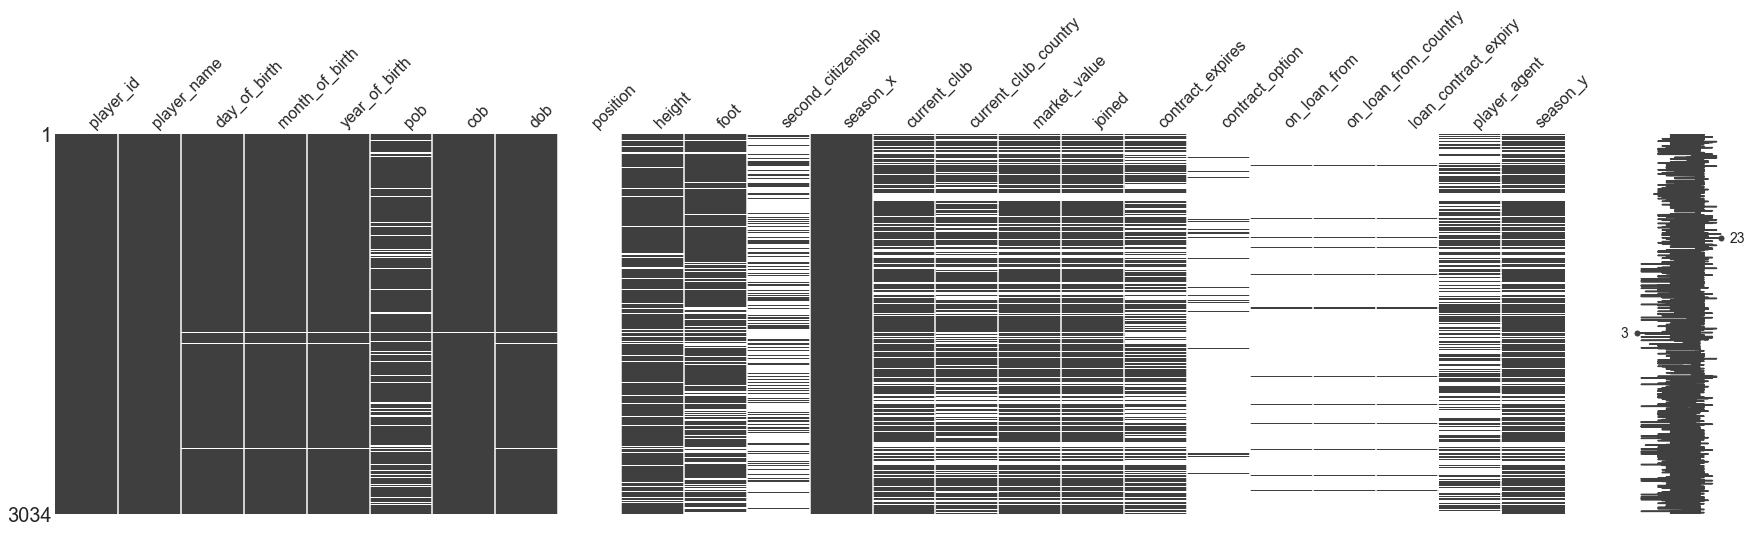

In [100]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_player_efl_1819_raw
msno.matrix(df_tm_player_efl_1819_raw, figsize = (30, 7))

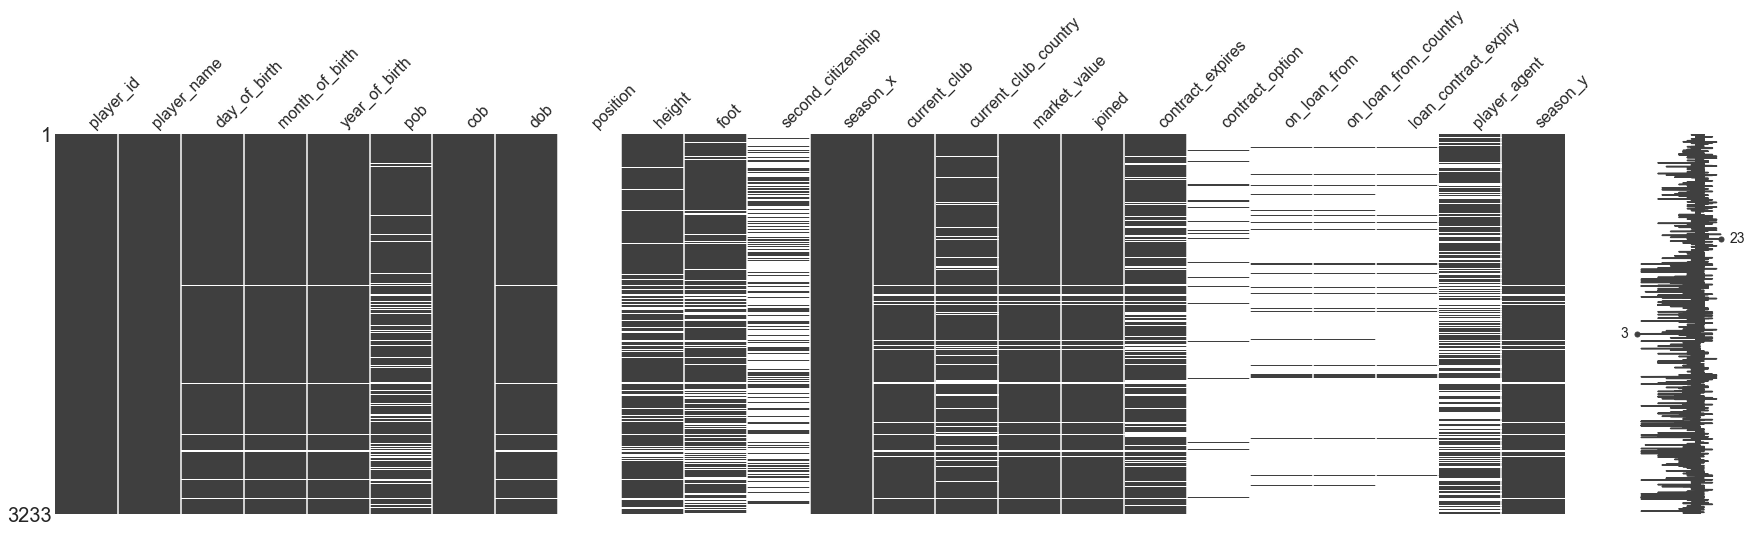

In [101]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_player_efl_1920_raw
msno.matrix(df_tm_player_efl_1920_raw, figsize = (30, 7))

In [102]:
# Counts of missing values
tm_1819_null_value_stats = df_tm_player_efl_1819_raw.isnull().sum(axis=0)
tm_1819_null_value_stats[tm_1819_null_value_stats != 0]

day_of_birth              55
month_of_birth            55
year_of_birth             55
pob                      415
cob                        1
dob                       55
position                3034
height                   379
foot                     645
second_citizenship      2130
current_club             822
current_club_country    1096
market_value             822
joined                   822
contract_expires        1243
contract_option         2887
on_loan_from            2941
on_loan_from_country    2941
loan_contract_expiry    2949
player_agent            1522
season_y                 822
dtype: int64

In [103]:
# Counts of missing values
tm_1920_null_value_stats = df_tm_player_efl_1920_raw.isnull().sum(axis=0)
tm_1920_null_value_stats[tm_1920_null_value_stats != 0]

day_of_birth              55
month_of_birth            55
year_of_birth             55
pob                      431
cob                        1
dob                       55
position                3233
height                   392
foot                     661
second_citizenship      2233
current_club             127
current_club_country     493
market_value             127
joined                   131
contract_expires         714
contract_option         3019
on_loan_from            3058
on_loan_from_country    3058
loan_contract_expiry    3073
player_agent            1169
season_y                 127
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `value` column, but otherwise the dataset is complete.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Assign Raw DataFrames to New Engineered DataFrames</a>

In [33]:
# Export scraped DataFrame as a CSV
df_tm_player_efl_1819_raw = pd.read_csv(data_dir_tm + '/raw/1819/combined/' + 'tm_player_efl_joined_all_1819_last_updated_19092020.csv')

In [34]:
# Export scraped DataFrame as a CSV
df_tm_player_efl_1920_raw = pd.read_csv(data_dir_tm + '/raw/1920/combined/' + 'tm_player_efl_joined_all_1920_last_updated_19092020.csv')

In [35]:
# Assign Raw DataFrame to new Engineered DataFrame
df_tm_player_efl_1819 = df_tm_player_efl_1819_raw

In [36]:
# Assign Raw DataFrame to new Engineered DataFrame
df_tm_player_efl_1920 = df_tm_player_efl_1920_raw

### <a id='#section4.2'>4.2. Concatenate DataFrames</a>

In [37]:
df_tm_player_efl_1819_1920 = pd.concat([df_tm_player_efl_1819, df_tm_player_efl_1920], axis=0)

In [38]:
df_tm_player_efl_1819_1920

,player_id,player_name,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,position,height,...,current_club_country,market_value,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season_y
0,173900,hélder costa,12.0,1.0,1994.0,Luanda,Angola,12/01/1994,NaN,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392763,ian poveda,9.0,2.0,2000.0,London,England,09/02/2000,NaN,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,332337,will huffer,30.0,10.0,1998.0,London,England,30/10/1998,NaN,184.0,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,2018-2019
3,335721,ben white,8.0,10.0,1997.0,Poole,England,08/10/1997,NaN,185.0,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,2018-2019
4,596446,leif davis,12.0,1.0,2000.0,Newcastle,England,12/01/2000,NaN,177.0,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,131980,conor thomas,29.0,10.0,1993.0,Coventry,England,1993-10-29,NaN,185.0,...,england,150000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,TRP Sports,2019-2020
3229,91289,chris clements,6.0,2.0,1990.0,Birmingham,England,1990-02-06,NaN,175.0,...,england,150000.0,2018-08-27,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3230,471910,alex addai,20.0,12.0,1993.0,London,England,1993-12-20,NaN,178.0,...,england,0.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020
3231,698011,tom chamberlain,1.0,6.0,2002.0,Cheltenham,England,2002-06-01,NaN,187.0,...,england,0.0,2020-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,2019-2020


### <a id='#section4.3'>4.3. String Cleaning</a>

##### Name

In [39]:
df_tm_player_efl_1819_1920['name_lower'] = df_tm_player_efl_1819_1920['player_name'].str.normalize('NFKD')\
                                                                                    .str.encode('ascii', errors='ignore')\
                                                                                    .str.decode('utf-8')\
                                                                                    .str.lower()

In [40]:
# First Name Lower
df_tm_player_efl_1819_1920['firstname_lower'] = df_tm_player_efl_1819_1920['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_tm_player_efl_1819_1920['lastname_lower'] = df_tm_player_efl_1819_1920['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_tm_player_efl_1819_1920['firstinitial_lower'] = df_tm_player_efl_1819_1920['name_lower'].astype(str).str[0]

### <a id='#section4.5'>4.5. Converting Data Types</a>

##### DoB
First we need to convert the `dob` column from the `object` data type to `datetime64[ns]`, again using the [.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [41]:
# Convert birth_date from string to datetime64[ns]
df_tm_player_efl_1819_1920['dob'] = pd.to_datetime(df_tm_player_efl_1819_1920['dob'])

##### Value
The `value` column needs to be converted from a string to an integer using to [to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) method.

In [42]:
# Convert string to integer
df_tm_player_efl_1819_1920['market_value'] = pd.to_numeric(df_tm_player_efl_1819_1920['market_value'])

### <a id='#section4.7'>4.7. Columns of Interest</a>
We are interested in the following thirteen columns in the [TransferMarkt](https://www.transfermarkt.co.uk/) dataset:
*    `name`
*    `name_lower`
*    `firstinitial_lower`
*    `firstname_lower`
*    `lastname_lower`
*    `position_description`
*    `position_description_cleaned`
*    `value`
*    `birth_date`
*    `birth_year`
*    `birth_month`
*    `age`
*    `playing_country`

In [43]:
# Select columns of interest
df_tm_player_efl_1819_1920 = df_tm_player_efl_1819_1920[['name_lower', 'firstname_lower', 'lastname_lower', 'firstinitial_lower', 'day_of_birth', 'month_of_birth', 'year_of_birth', 'pob', 'cob', 'dob', 'height', 'foot', 'second_citizenship', 'season_x', 'current_club', 'current_club_country', 'market_value', 'joined', 'contract_expires', 'contract_option', 'on_loan_from', 'on_loan_from_country', 'loan_contract_expiry', 'player_agent']]

### <a id='#section4.8'>4.8. Convert Euros to Pounds</a>

In [44]:
rate = 0.92

In [45]:
df_tm_player_efl_1819_1920['market_value_pounds'] = df_tm_player_efl_1819_1920['market_value'] * 0.92

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### <a id='#section4.9'>4.9. Rename Columns</a>

In [46]:
df_tm_player_efl_1819_1920 = df_tm_player_efl_1819_1920.rename(columns={'season_x': 'season',
                                                                        'market_value': 'market_value_euros'
                                                                       })

In [47]:
df_tm_player_efl_1819_1920

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-09-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-08-10,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-12-01,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,92000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,conor thomas,conor,thomas,c,29.0,10.0,1993.0,Coventry,England,1993-10-29,...,england,150000.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,TRP Sports,138000.0
3229,chris clements,chris,clements,c,6.0,2.0,1990.0,Birmingham,England,1990-02-06,...,england,150000.0,2018-08-27,2021-06-30,NaN,NaN,NaN,NaN,NaN,138000.0
3230,alex addai,alex,addai,a,20.0,12.0,1993.0,London,England,1993-12-20,...,england,0.0,2018-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,0.0
3231,tom chamberlain,tom,chamberlain,t,1.0,6.0,2002.0,Cheltenham,England,2002-06-01,...,england,0.0,2020-07-01,2021-06-30,NaN,NaN,NaN,NaN,NaN,0.0


### <a id='#section4.10'>4.10. Split Dataset into 2018/19 and 2019/20 Season</a>

In [48]:
# Assign df_tm as a new DataFrame - df_tm_player_efl_all, to represent all the players
df_tm_player_efl_all = df_tm_player_efl_1819_1920

# Filter DataFrame for the 2018-2019 season
df_tm_player_efl_1819 = df_tm_player_efl_all[df_tm_player_efl_all['season'] == '2018-2019']

# Filter DataFrame for the 2018-2019 season
df_tm_player_efl_1920 = df_tm_player_efl_all[df_tm_player_efl_all['season'] == '2019-2020']

In [49]:
df_tm_player_efl_all.head()

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-09-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-08-10,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-12-01,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,92000.0


In [50]:
df_tm_player_efl_1819.head()

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-09-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,01/07/2020,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-08-10,...,england,5500000.0,01/07/2018,30/06/2024,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-12-01,...,england,100000.0,04/07/2018,30/06/2023,NaN,NaN,NaN,NaN,NaN,92000.0


In [51]:
# Filter DataFrame for the 2018-2019 season
df_tm_player_efl_1920.head()

,name_lower,firstname_lower,lastname_lower,firstinitial_lower,day_of_birth,month_of_birth,year_of_birth,pob,cob,dob,...,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,market_value_pounds
0,helder costa,helder,costa,h,12.0,1.0,1994.0,Luanda,Angola,1994-01-12,...,england,8000000.0,2020-07-01,2024-06-30,NaN,NaN,NaN,NaN,Gestifute,7360000.0
1,ian poveda,ian,poveda,i,9.0,2.0,2000.0,London,England,2000-02-09,...,england,675000.0,2020-01-24,2024-06-30,NaN,NaN,NaN,NaN,Elite Project Group Ltd,621000.0
2,will huffer,will,huffer,w,30.0,10.0,1998.0,London,England,1998-10-30,...,NaN,100000.0,2020-07-01,NaN,NaN,NaN,NaN,NaN,Stellar Football Ltd,92000.0
3,ben white,ben,white,b,8.0,10.0,1997.0,Poole,England,1997-10-08,...,england,5500000.0,2018-07-01,2024-06-30,NaN,NaN,NaN,NaN,NaN,5060000.0
4,leif davis,leif,davis,l,12.0,1.0,2000.0,Newcastle,England,2000-01-12,...,england,100000.0,2018-07-04,2023-06-30,NaN,NaN,NaN,NaN,NaN,92000.0


### <a id='#section4.11'>4.11. Exporting the Engineered DataFrames</a>
Export the three engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrames as CSV files.

In [55]:
# Datetime
import datetime
from datetime import date
import time

In [53]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [54]:
# Export the three DataFrames
df_tm_player_efl_all.to_csv(data_dir_tm + '/engineered/combined/' + f'tm_player_efl_all_last_updated_{today}.csv', index=None, header=True)
df_tm_player_efl_1819.to_csv(data_dir_tm + '/engineered/1819/' + f'tm_player_efl_1819_last_updated_{today}.csv', index=None, header=True)
df_tm_player_efl_1920.to_csv(data_dir_tm + '/engineered/1920/' + f'tm_player_efl_1920_last_updated_{today}.csv', index=None, header=True)

Now we have created three pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Exploratory Data Analysis</a>

### <a id='#section5.1'>5.1. Introduction</a>
...

### <a id='#section5.2'>5.2. ...</a>
...

## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section9.1'>8.1. Bibliography</a>

#### Data and Web Scraping
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/)
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).

### <a id='#section9.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)